# Scientific Computing

While the base Python language can be used for scientific applications, most scientific work in Python uses the *NumPy* (Numeric Python) package to work with arrays of datapoints.

When completing exercises, you may find it helpful to have the chapter [website](https://mortonne.github.io/datascipsych/chapters/chapter4/scientific_computing.html) and [cheat sheet](https://mortonne.github.io/datascipsych/chapters/chapter4/review.html) open in a browser.

## Limitations of basic Python

We can do a lot with the basic Python data structures, like lists and dictionaries. But for handling scientific data, like responses in a psychology study, they have limitations.

For example, say that a participant in a study was shown a list of words, and then shown another list of words and asked to say whether each one was shown before (*old*) or not (*new*). On each trial, we have two pieces of information to keep track of: whether it was a *target* or a *lure*, and whether they said it was old or new. We can put this information into two Python lists.

In [1]:
trial_type = ["target", "lure", "lure", "target", "lure", "target", "target", "lure"]
response = ["old", "old", "new", "old", "new", "new", "old", "new"]

Using a `for` loop and an `if/elif` statement, we can then score the responses to get the number of hits and false alarms.

In [2]:
hits = 0
false_alarms = 0
for tt, r in zip(trial_type, response):
    if tt == "target" and r == "old":
        hits += 1
    elif tt == "lure" and r == "old":
        false_alarms += 1

Finally, we can calculate hit rate (HR) and false alarm rate (FAR) by counting the number of trials in each condition and dividing by that.

In [3]:
n_targets = 0
n_lures = 0
for tt in trial_type:
    if tt == "target":
        n_targets += 1
    else:
        n_lures += 1
hr = hits / n_targets
far = false_alarms / n_lures
print(f"Hit rate: {hr}, false alarm rate: {far}")

Hit rate: 0.75, false alarm rate: 0.25


As we can see from the example, it's possible to analyze scientific data using Python lists. But it took multiple `for` loops and `if` statements. And it will run pretty slowly, if you have a lot of data. Fortunately, we can use NumPy to simplify common analysis approaches.

## NumPy arrays
In science, we often have *arrays* of data, corresponding to multiple measurements of some variable. To analyze the data, we may need to sort these measurements into different conditions and calculate various statistics. NumPy (Numeric Python) is designed to make this process easier using a new data type called *ndarray*, or N-dimensional array.

First, we need to make sure NumPy is installed. It is not a built-in Python package, so we must install it from the Python Package Index (PyPI). If you have set up the `datascipsych` project, you should already have it set up in your environment. See the [README](https://github.com/mortonne/datascipsych?tab=readme-ov-file#installation) for installation instructions.

If NumPy is installed, you should be able to import it. We will use the conventional way of importing NumPy, using `import numpy as np`. NumPy functions can then be called using `np.[function_name]`.

In [4]:
import numpy as np
from IPython.display import display

NumPy lets us put multiple measurements of the same type into an array that is designed for analysis of scientific data. We can do this by calling `np.array` and passing in a list of data.

In [5]:
integers = np.array([1, 2, 3])
floats = np.array([1.1, 2.2, 3.3])
letters = np.array(["a", "b", "c"])
print(integers, floats, letters)

[1 2 3] [1.1 2.2 3.3] ['a' 'b' 'c']


Each array has one datatype, indicating the type of data stored in it.

In [6]:
print(integers.dtype, floats.dtype, letters.dtype)

int64 float64 <U1


The integers are stored as 64-bit integers, the decimals as 64-bit floats, and the letters as strings (the "U" stands for unicode, a common data format for representing text). NumPy automatically uses the smallest length of string possible to hold the data, so it stores our one-character strings using one character (U1) for each part of the array.

Each array also has a `size` attribute that tells total size (i.e., the number of elements) of the array. The `ndim` attribute tells us how many dimensions an array has. So far, we're just using 1-dimensional arrays. The `shape` attribute gives the size of each dimension.

In [7]:
print(f"Total size of the array: {integers.size}")
print(f"Number of dimensions: {integers.ndim}")
print(f"Size of each dimension: {integers.shape}")

Total size of the array: 3
Number of dimensions: 1
Size of each dimension: (3,)


We can also make arrays with multiple dimensions. For example, if we read in a PNG image, we will have three dimensions: height, width, and color/transparency. Here, we'll use the Matplotlib library to read a PNG file into a NumPy array. We'll also plot it so we can see what the image is.

Dimensions: 3, Shape: (164, 580, 4)


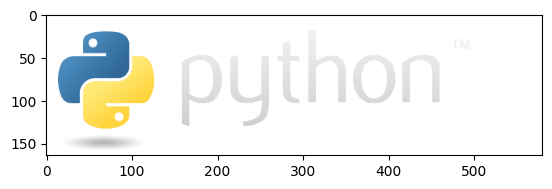

In [8]:
import matplotlib.pyplot as plt
image = plt.imread('images/python-logo.png')
print(f"Dimensions: {image.ndim}, Shape: {image.shape}")
ax = plt.imshow(image)

We will mostly work with 1D arrays. But NumPy can handle any number of dimensions, which can be very helpful for working with more complex data.

### Exercise: NumPy arrays
Create an array called `a` with these integers: 4, 3, 2, 1

Create an array called `b` with these floats: 1.4, 2.3, 1.9

Use array attributes to get the size, number of dimensions, and shape of your `b` array.

In [9]:
# answer here

## Array expressions
When data are in an array, we can work with whole arrays together as a unit. For example, we can operate on a whole array using math expressions.

In [10]:
floats = np.array([1.1, 2.2, 3.3])
print(floats + 2)
print(floats * 2)
print(floats ** 2)

[3.1 4.2 5.3]
[2.2 4.4 6.6]
[ 1.21  4.84 10.89]


Notice that this is a lot easier using NumPy arrays than it would be using lists. We could use list comprehensions to do something similar, but it's harder to read and slower to run.

In [11]:
f_list = [1.1, 2.2, 3.3]
print([f + 2 for f in f_list])
print([f * 2 for f in f_list])
print([f ** 2 for f in f_list])

[3.1, 4.2, 5.3]
[2.2, 4.4, 6.6]
[1.2100000000000002, 4.840000000000001, 10.889999999999999]


Using NumPy arrays, we can also use operations to make calculations with whole arrays.

In [12]:
integers = np.array([1, 2, 3])
floats = np.array([1.1, 2.2, 3.3])
print(integers + floats)
print(integers * floats)

[2.1 4.2 6.3]
[1.1 4.4 9.9]


Note that addition and multiplication operations are calculated *elementwise*, adding or multiplying numbers in corresponding positions.

We can calculate matrix multiplication also, using the `@` operator. For example, we can calculate the dot product of our `floats` vector, which calculates the sum of the product of each corresponding element.

In [13]:
print(floats @ floats)

16.939999999999998


Matrix multiplication is important for methods such as regression that involve linear algebra.

### Exercise: array expressions
Create an array `x` with the numbers 1, 2, 3, and 4. Calculate `x * 2` and `x ** 2`. Create another array `y` with numbers 5, 6, 7, and 8. Calculate `x + y`. 

Try removing the last element of `y` and then running `x + y` again. What happens? What happens if you change `y` to be an array with only the number 5 and then calculate `x + y`?

#### Advanced
Calculate the dot product between `x` and `y`. This is the sum of the product of each element of `x` and `y`. You can calculate it using matrix multiplication.

In [14]:
# answer here

## Creating arrays
We can create arrays in two basic ways. First, as we've seen, we can create a list and convert (or *cast*) it into an array.

In [15]:
a = np.array([6, 5, 4, 3, 2, 1])
a

array([6, 5, 4, 3, 2, 1])

We can also use various NumPy functions to make arrays of specific shapes. For example, we can create an array with all zeros using `np.zeros`.

In [16]:
z = np.zeros(6, dtype=int)
z

array([0, 0, 0, 0, 0, 0])

The optional `dtype` argument lets us set the data type of the array. For example, we can use this with `np.zeros` to create a boolean array that is False at each position in the array.

In [17]:
all_false = np.zeros(5, dtype=bool)
all_false

array([False, False, False, False, False])

Boolean arrays are sometimes used to filter other arrays. For example, say we have one array with data, and another array determining whether each data point should be included.

In [18]:
data = np.array([10.2, 15.4, 13.1, 15.0])
include = np.array([True, True, False, True])
data[include]

array([10.2, 15.4, 15. ])

We can index an array with a boolean array, and get back just the items where the boolean array is `True`. We will talk more about array filtering later.

NumPy has functions to make two common types of arrays, filled with all zeros (as we just saw) or all ones.

In [19]:
np.zeros(4)

array([0., 0., 0., 0.])

The `shape` argument can take an integer, if there is just one dimension, or a tuple, if there are multiple dimensions. Here, we'll create an array with 5 rows and 2 columns.

In [20]:
np.ones((5, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

It's also often useful to make an array with numbers in order. We can do this using `np.arange`. The end-point is non-inclusive; for example, if we pass 6, then the last item will be 5. This is similar to how indexing works; by default, `np.arange` starts counting at 0.

In [21]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

We can adjust the starting and stopping point of the array. If we pass two arguments, the first will be the starting point, and the last will be the ending point.

In [22]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Note that the upper bound is non-inclusive.

Finally, we can make increasing values in a more flexible way using `np.linspace`.

In [23]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Here, we make 11 values ranging from 0 to 1, with the values being evenly spaced.

### Exercise: creating arrays
Use the `np.ones` function to create an array called `a` with 6 ones.

Use the `np.zeros` function to create a 2 x 2 array called `b` with zeros.

Use the `np.arange` function to create an array called `c` with the numbers 1 through 5.

In [24]:
# answer here

## Accessing data in arrays
Just like we saw before with lists, we can access data in an array using indexing and slicing.

In [25]:
a = np.arange(1, 11)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [26]:
print(a[9])

10


In [27]:
a[:5]

array([1, 2, 3, 4, 5])

Things get a little more complicated for 2D arrays, because we can specify indexes for both dimensions. First, let's make a matrix by passing in a list of lists to `np.array`.

In [28]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

We can access part of the matrix using indexing, if we pass indices for both dimensions. For example, using the index `[1, 0]` will get number at the second row and first column.

![3x3 matrix highlighting the second row, first column](images/access_index.svg)

In [29]:
print(matrix[1, 0])

4


We can take slices through either dimension, or both, to access data from part of the matrix. Here, we'll get the first two rows and last two columns.

![3x3 matrix highlighting the first two rows and last two columns](images/access_slice.svg)

In [30]:
matrix[:2, 1:]

array([[2, 3],
       [5, 6]])

For example, let's look again at the PNG image we loaded before. We'll reload it here to make sure we have it in memory. We can use slicing to crop the image by getting the first 135 columns, so that we just have the Python logo without the text.

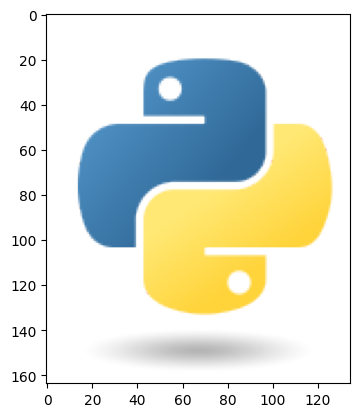

In [31]:
image = plt.imread('images/python-logo.png')
ax = plt.imshow(image[:, :135])

When we take a slice of an array, we get what NumPy calls a *view* of the array. Instead of making a new array with the data in the part that we accessed, we get a "view" of that part of the array. This means that, if we change the data in our "view", we modify the original array.

In [32]:
a = np.arange(1, 11)
b = a[:5]
b += 10
a

array([11, 12, 13, 14, 15,  6,  7,  8,  9, 10])

If we want to copy the sub-array instead, we can use the `copy` method.

In [33]:
a = np.arange(1, 11)
b = a[:5].copy()
b += 10
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Note that, this time, the original `a` array isn't affected when we change `b`. This is because `b` is now a copy of `a` instead of a view.

### Exercise: accessing data in arrays
Create an array `a` with the numbers 1:10. Print the third element in the array. Then use slicing to get a view of the array `b` that includes the numbers 4-6.

In [34]:
# answer here

## Array functions
We can use various functions to work with data in NumPy arrays.

The `np.sum` function calculates the total for an array.

In [35]:
correct = np.array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1])
total = np.sum(correct)
print(f"Total correct: {total}")

Total correct: 7


The `np.mean` function can be used to calculate the mean of an array (that is, the sum divided by the number of observations). If we have an array with 1 for correct and 0 for incorrect, we can use the mean to calculate accuracy as the fraction of correct responses.

In [36]:
accuracy = np.mean(correct)
print(f"Accuracy: {round(accuracy * 100)}%")

Accuracy: 58%


### Exercise: array functions
Say that a study participant completed eight trials of a memory task. They answered correctly on trials 1, 2, 4, 5, and 8, and answered incorrectly on the other trials.

Define an array called `correct` with 1 on correct trials and 0 on incorrect trials. Calculate the overall accuracy (that is, the fraction of correct trials).

#### Advanced
Print out the accuracy as a percentage.

In [37]:
# answer here

## Applying functions to multidimensional arrays

Arrays can have multiple dimensions, and functions may be applied across specified dimensions.

Many array functions, such as `np.mean`, take an optional second input argument called `axis`. The `axis` argument indicates the dimension over which the function should be applied. Python numbers dimensions starting with rows, then columns, then any additional dimensions. As usual, Python numbers things starting with 0, so `axis=0` indicates that we want to calculate over the first dimension (rows), and `axis=1` indicates the second dimension (columns).

For example, when using `np.sum`, we can set `axis=0` to calculate a sum for each column.

![3x2 matrix with columns highlighted](images/matrix_axis0.svg) 

![3 x 1 matrix with columns highlighted](images/matrix_axis0_sum.svg)

To calculate a sum for each row instead, we can set `axis=1`.

![3x2 matrix with rows highlighted](images/matrix_axis1.svg) 

![3x2 matrix with rows highlighted](images/matrix_axis1_sum.svg)

Say that we have data from a free-recall study where a participant studied 4 lists of 6 words each. After each list was presented, the participant tried to recall all of the items from that list. The `recall` array below shows which words were recalled (labed as 1) or not (labeled as 0). Rows indicate different lists, and columns indicate different *serial positions*, that is, the position in the list that each word was presented.

In [38]:
recall = np.array(
    [
        [1, 1, 0, 0, 0, 1],
        [0, 1, 1, 0, 1, 1],
        [1, 0, 0, 1, 1, 1],
        [1, 1, 0, 1, 0, 1],
    ]
)

We can use `np.mean` to calculate the fraction of words recalled, in different ways.

Using `np.mean` with no `axis` argument calculates the mean over all words and lists; this is the overall fraction of words recalled.

In [39]:
np.mean(recall)

np.float64(0.625)

If we set `axis=0`, we will calculate an average across rows for each column. This is the fraction of recalled words for each serial position, averaged across lists. This is the standard *serial position curve* analysis commonly used in memory studies of free recall.

In [40]:
np.mean(recall, axis=0)

array([0.75, 0.75, 0.25, 0.5 , 0.5 , 1.  ])

Finally, we can set `axis=1` to get the average across columns for each row. This is the fraction of recalled words for each of the four lists, averaged across serial position.

In [41]:
np.mean(recall, axis=1)

array([0.5       , 0.66666667, 0.66666667, 0.66666667])

### Exercise: applying functions to multidimensional arrays

Create an array with three rows and two columns, with the following data indicating assessment scores for three participants in two assessments.

$$\begin{bmatrix}
7 & 8 \\
3 & 4 \\
7 & 5 \\
\end{bmatrix}$$

Use one call of `np.sum` to calculate the sum of the two assessments for each of the three participants. Then use one call of `np.mean` to calculate the mean score for each of the two asessments.

In [42]:
# answer here

## Filtering arrays
Boolean arrays can be used to get subsets of data to analyze.

We can index a NumPy array using another array. This lets us quickly get different subsets of data. For example, say we measured response time in two different conditions, labeled condition 1 and condition 2.

In [43]:
response_time = np.array([1.2, 3.5, 1.4, 2.7, 1.8, 4.1, 1.7, 4.5])
condition = np.array([1, 2, 1, 2, 1, 2, 1, 2])

![array of response times](images/filter_rt.svg)

![array of condition codes](images/filter_cond.svg)

To filter the `response_time` array, we first create a boolean array that is `True` for the condition we are interested in.

In [44]:
condition == 1

array([ True, False,  True, False,  True, False,  True, False])

![filter array for condition 1](images/filter_cond1.svg)

We can use the boolean array to index the `response_time` array and get just the observations for that condition.

In [45]:
response_time[condition == 1]

array([1.2, 1.4, 1.8, 1.7])

![accessing response times for condition 1](images/filter_rt_cond1.svg)

We can use NumPy functions together with array filtering to analyze subsets of data. For example, we can use `np.mean` to calculate the mean response time for condition 1 and condition 2.

In [46]:
rt1 = np.mean(response_time[condition == 1])
rt2 = np.mean(response_time[condition == 2])
print(f"Mean RT (condition 1): {rt1}")
print(f"Mean RT (condition 2): {rt2}")

Mean RT (condition 1): 1.525
Mean RT (condition 2): 3.7


### Exercise: filtering arrays
Say that a participant completed 6 trials of a memory task. They answered correctly on trials 2, 3, and 4, and answered incorrectly on the other trials. Their response time on the 6 trials (in seconds) was 4.2, 2.3, 1.6, 2.5, 5.3, and 4.3.

Create an array called `correct` with 1 on correct trials and 0 on incorrect trials. Create another array called `response_time` with the response time in seconds on each trial.

Use array filtering an the `np.mean` function to calculate the mean response time for correct trials and the mean response time for incorrect trials.

In [47]:
# answer here

## Combining array conditionals

Similar to how we can combine conditionals with the `and`, `or`, and `not` keywords, we can do something similar with arrays. However, we need to use different symbols when working with arrays.

To negate an array, we use `~` instead of `not`. Note that we need to add parentheses around the statement (`condition == 1`) to use this here.

In [48]:
print(condition == 1)
print(~(condition == 1))

[ True False  True False  True False  True False]
[False  True False  True False  True False  True]


To combine two conditionals, we can use `&` instead of `and`. Note how the output is only `True` when both conditionals apply.

In [49]:
print(response_time < 3)
print(condition == 2)
print((response_time < 3) & (condition == 2))

[ True False  True  True  True False  True False]
[False  True False  True False  True False  True]
[False False False  True False False False False]


We can also use `|` instead of `or`.

In [50]:
print(response_time < 1.5)
print(condition == 2)
print((response_time < 1.5) | (condition == 2))

[ True False  True False False False False False]
[False  True False  True False  True False  True]
[ True  True  True  True False  True False  True]


Make sure to put parentheses around each conditional statement that you are combining. If you leave out the parentheses, it may change the order of operations in a way you weren't expecting.

In [51]:
print((response_time < 1.5) | condition == 2)
print((response_time < 1.5) | (condition == 2))

[False  True False  True False  True False  True]
[ True  True  True  True False  True False  True]


### Exercise: combining array conditionals
Say we have response time in seconds for 6 trials, along with a condition code (1 or 2) and whether each trial was correct (1) or incorrect (0).

Calculate the mean response time for correct trials in condition 1. Calculate the mean response time for incorrect trials in condition 2.

In [52]:
response_time = np.array([2.3, 2.5, 2.8, 3.8, 3.1, 3.5])
condition = np.array([1, 1, 1, 2, 2, 2])
correct = np.array([1, 1, 0, 0, 1, 0])

In [53]:
# answer here

## Data analysis
Now that we have learned some tools for working with arrays, let's revisit the problem we previously solved using control flow. We'll use the same sample responses from a recognition memory experiment. We want to calculate hit rate (the fraction of targets with an "old" response) and false alarm rate (the fraction of lures with an "old" response).

We'll first define the data to analyze. Instead of leaving our data in lists, we'll place them in arrays.

In [54]:
trial_type = np.array(["target", "lure", "lure", "target", "lure", "target", "target", "lure"])
response = np.array(["old", "old", "new", "old", "new", "new", "old", "new"])

Instead of the 16 lines of code that we needed when using basic Python, when using NumPy we can do the same thing in 4 lines of code that are also easier to read. (Written a little differently, we could also do it in 2 lines of code.) First, we use filtering and the `np.sum` function to calculate the number of target and lure trials.

In [55]:
n_targets = np.sum(trial_type == "target")
n_lures = np.sum(trial_type == "lure")

Next, we will combine conditions to get the number of hits and false alarms and convert them into hit rate and false alarm rate.

In [56]:
hr = np.sum((trial_type == "target") & (response == "old")) / n_targets
far = np.sum((trial_type == "lure") & (response == "old")) / n_lures
print(f"Hit rate: {hr}, false alarm rate: {far}")

Hit rate: 0.75, false alarm rate: 0.25


## Summary

The NumPy package is designed to represent measurements of scientific observations in numeric arrays. Using NumPy arrays makes it easier to perform calculations on data. 

Arrays have attributes to provide information about the number of elements (`size`), the number of dimensions (`ndim`), the shape of the dimensions (`shape`), and the type of data represented in the array (`dtype`).

Arrays can be created by converting lists, or by using special array-creation functions such as `np.zeros`, `np.ones`, `np.arange`, and `np.linspace`.

NumPy functions can calculate many common statistics on data stored in arrays, such as `np.sum` and `np.mean`.

Similar to lists, data stored in arrays can be accessed using indexing and slicing. Arrays can also be filtered using boolean arrays to get subsets of data.

Combining array filtering with NumPy functions makes it possible to quickly calculate statistics for subsets of data.